In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Carregar CSV
df_mvp = pd.read_csv("mvp_stats.csv")

# Visualizar as primeiras linhas
df_mvp.head()

,SEASON_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLAYER_NAME
0,1975-76,LAL,29.0,82,82,3379,914,1728,0.529,0,...,272,1111,1383,413,119,338,0,292,2275,Kareem Abdul-Jabbar
1,1976-77,LAL,30.0,82,82,3016,888,1533,0.579,0,...,266,824,1090,319,101,261,0,262,2152,Kareem Abdul-Jabbar
2,1979-80,LAL,33.0,82,81,3143,835,1383,0.604,0,...,190,696,886,371,81,280,297,216,2034,Kareem Abdul-Jabbar
3,1977-78,POR,25.0,58,0,1929,460,882,0.522,0,...,118,648,766,291,60,146,206,145,1097,Bill Walton
4,1978-79,HOU,24.0,82,82,3390,716,1325,0.540,0,...,587,857,1444,147,79,119,326,223,2031,Moses Malone


In [127]:
# 1 - Perfil do Jogador MVP

## 1.1 Idade média dos MVPs
## 1.2 Idade mínima e máxima de um MVP
## 1.3 Idade do MVP por década

In [128]:
## 1.1 Idade média dos MVPs
idade_media = df_mvp["PLAYER_AGE"].mean()

# Jogadores mais próximos da média
dif_media = abs(df_mvp["PLAYER_AGE"] - idade_media)
jogador_media = df_mvp.loc[dif_media == dif_media.min(), "PLAYER_NAME"].unique()

print(f" Idade média dos MVPs: {idade_media:.1f} anos — Jogador(es) mais próximo da média: {', '.join(jogador_media)}")

 Idade média dos MVPs: 28.1 anos — Jogador(es) mais próximo da média: Moses Malone, Larry Bird, Michael Jordan, Shaquille O'Neal, Kevin Garnett, LeBron James, Stephen Curry, Russell Westbrook, James Harden


In [129]:
## 1.2 Idade mínima e máxima de um MVP
idade_min = df_mvp["PLAYER_AGE"].min()
idade_max = df_mvp["PLAYER_AGE"].max()

# Jogador(es) com idade mínima
jogador_min = df_mvp.loc[df_mvp["PLAYER_AGE"] == idade_min, "PLAYER_NAME"].unique()

# Jogador(es) com idade máxima
jogador_max = df_mvp.loc[df_mvp["PLAYER_AGE"] == idade_max, "PLAYER_NAME"].unique()

print(f" Idade mínima: {idade_min} anos — Jogador(es): {', '.join(jogador_min)}")
print(f" Idade máxima: {idade_max} anos — Jogador(es): {', '.join(jogador_max)}")

 Idade mínima: 22.0 anos — Jogador(es): Derrick Rose
 Idade máxima: 35.0 anos — Jogador(es): Michael Jordan, Karl Malone


 Idade média dos MVPs por década:
  • 1970s: 28.2 anos
  • 1980s: 27.8 anos
  • 1990s: 31.1 anos
  • 2000s: 27.7 anos
  • 2010s: 26.2 anos
  • 2020s: 27.4 anos


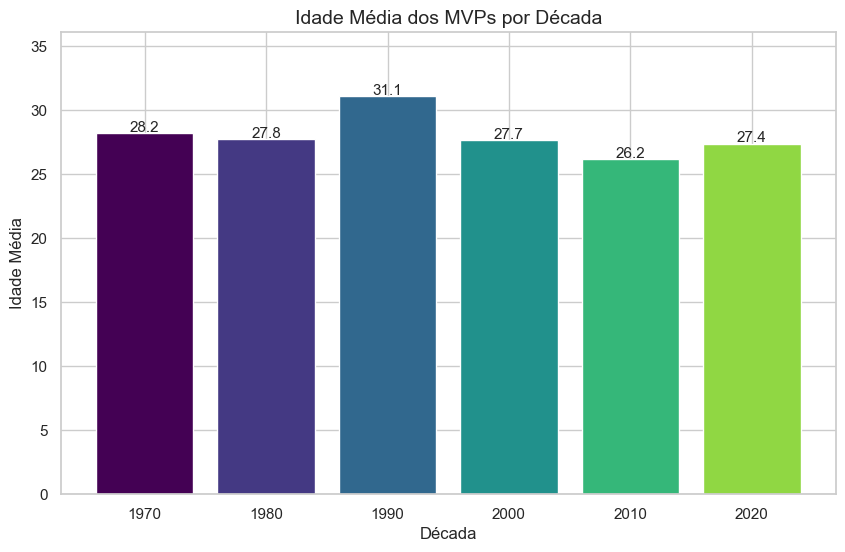

In [130]:
## 1.3 Idade do MVP por década
# Extrair o ano da temporada
df_mvp["Year"] = df_mvp["SEASON_ID"].str[:4].astype(int)

# Criar coluna "Decade"
df_mvp["Decade"] = (df_mvp["Year"] // 10) * 10

# Calcular idade média por década
df_idade_decada = df_mvp.groupby("Decade")["PLAYER_AGE"].mean().reset_index()
df_idade_decada.rename(columns={"PLAYER_AGE": "AverageAge"}, inplace=True)

# Exibir idade média por década
idade_por_decada = dict(zip(df_idade_decada["Decade"], df_idade_decada["AverageAge"]))
print(" Idade média dos MVPs por década:")
for decada, idade in idade_por_decada.items():
    print(f"  • {decada}s: {idade:.1f} anos")

# Plot manual com cores do colormap
cmap = plt.get_cmap("viridis")
colors = [cmap(i / len(df_idade_decada)) for i in range(len(df_idade_decada))]

plt.figure(figsize=(10,6))
bars = plt.bar(df_idade_decada["Decade"].astype(str), df_idade_decada["AverageAge"], color=colors)

# Adicionar valores acima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"{yval:.1f}", ha='center', fontsize=11)

plt.title("Idade Média dos MVPs por Década", fontsize=14)
plt.xlabel("Década", fontsize=12)
plt.ylabel("Idade Média", fontsize=12)
plt.ylim(0, max(df_idade_decada["AverageAge"]) + 5)  # espaço para os valores
plt.show()

In [131]:
## 2 - Produção Ofensiva

### 2.1 Pontuação média por jogo dos MVPs

### 2.2 Média de pontos por jogo dos MVPs

### 2.3 Evolução do aproveitamento de arremessos (FG%) ao longo das décadas

### 2.4 Arremesso de 3 pontos (3P%) nos MVPs modernos


In [132]:
# 2.1 Pontuação média por jogo dos MVPs
print(" 2.1 Pontuação média por jogo dos MVPs")

# Garantir que PTS e GP sejam numéricos
df_mvp["PTS"] = pd.to_numeric(df_mvp["PTS"], errors='coerce')
df_mvp["GP"] = pd.to_numeric(df_mvp["GP"], errors='coerce')

# Calcular pontuação média por jogo
pts_medio_jogo = (df_mvp["PTS"] / df_mvp["GP"]).mean()
print(f" Pontuação média por jogo: {pts_medio_jogo:.1f} pontos")

 2.1 Pontuação média por jogo dos MVPs
 Pontuação média por jogo: 27.0 pontos


In [133]:
# 2.2 Média de pontos por jogo dos MVPs
print("\n 2.2 Média de Pontos por Jogo de Todos os MVPs")

# Calcular média de pontos por jogo para cada linha
df_mvp["PTS_PG"] = df_mvp["PTS"] / df_mvp["GP"]

# Adicionar ano da temporada
df_mvp["Year"] = df_mvp["SEASON_ID"].str[:4].astype(int)

# Encontrar maior e menor PTS por jogo
max_pts_pg = df_mvp["PTS_PG"].max()
min_pts_pg = df_mvp["PTS_PG"].min()

# Destacar os MVPs correspondentes
df_mvp["Highlight"] = df_mvp["PTS_PG"].apply(
    lambda x: "Máximo" if x == max_pts_pg else ("Mínimo" if x == min_pts_pg else "")
)

# Ordenar do maior para o menor PTS/PG
df_mvp_sorted = df_mvp.sort_values(by="PTS_PG", ascending=False)

# Exibir todos os MVPs com média de pontos por jogo e ano
for idx, row in df_mvp_sorted.iterrows():
    destaque = f" ({row['Highlight']})" if row['Highlight'] else ""
    print(f" {row['PLAYER_NAME']} ({row['Year']}): {row['PTS_PG']:.1f} PTS/GP{destaque}")


 2.2 Média de Pontos por Jogo de Todos os MVPs
 Michael Jordan (1987): 35.0 PTS/GP (Máximo)
 Joel Embiid (2022): 33.1 PTS/GP
 Shai Gilgeous-Alexander (2024): 32.7 PTS/GP
 Kevin Durant (2013): 32.0 PTS/GP
 Russell Westbrook (2016): 31.6 PTS/GP
 Michael Jordan (1990): 31.5 PTS/GP
 Moses Malone (1981): 31.1 PTS/GP
 Allen Iverson (2000): 31.1 PTS/GP
 James Harden (2017): 30.4 PTS/GP
 Michael Jordan (1995): 30.4 PTS/GP
 Stephen Curry (2015): 30.1 PTS/GP
 Michael Jordan (1991): 30.1 PTS/GP
 LeBron James (2009): 29.7 PTS/GP
 Shaquille O'Neal (1999): 29.7 PTS/GP
 Giannis Antetokounmpo (2019): 29.5 PTS/GP
 Michael Jordan (1997): 28.7 PTS/GP
 Larry Bird (1984): 28.7 PTS/GP
 LeBron James (2008): 28.4 PTS/GP
 Kobe Bryant (2007): 28.3 PTS/GP
 Kareem Abdul-Jabbar (1975): 27.7 PTS/GP
 Giannis Antetokounmpo (2018): 27.7 PTS/GP
 David Robinson (1994): 27.6 PTS/GP
 Karl Malone (1996): 27.4 PTS/GP
 Hakeem Olajuwon (1993): 27.3 PTS/GP
 LeBron James (2011): 27.1 PTS/GP
 Nikola Jokic (2021): 27.1 PTS/GP
 L

In [134]:
# 2.2 Gráfico de média de pontos por jogo dos MVPs
fig = px.scatter(
    df_mvp,
    x="Year",
    y="PTS_PG",
    color="Decade",
    color_discrete_sequence=px.colors.qualitative.Dark24,
    hover_data={
        "PLAYER_NAME": True,
        "Year": True,
        "PTS": True,
        "GP": True,
        "PTS_PG": ":.1f"
    },
    title="Média de Pontos por Jogo dos MVPs por Temporada",
    labels={
        "PTS_PG": "Pontos por Jogo",
        "Year": "Ano da Temporada",
        "Decade": "Década"
    }
)

fig.update_layout(
    legend_title_text="Década",
    title_font_size=18,
    legend_font_size=12,
    plot_bgcolor="#2f2f2f",   # fundo do gráfico
    paper_bgcolor="#2f2f2f",  # fundo geral
    font=dict(color="white"),
    xaxis=dict(
        tickmode="linear",
        dtick=2,
        showgrid=False,
        showline=True,
        linecolor="white",  # linha inferior
        mirror=False
    ),
    yaxis=dict(
        tickformat=".1f",
        showgrid=False,
        showline=True,
        linecolor="white",  # linha lateral esquerda
        mirror=False
    )
)

fig.show()